# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [35]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [36]:
# Define the col names for the iris dataset
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
df = pd.read_csv(url, header=None, names=col_names)

print(df.head())



   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [37]:
print("Dataset description:")
print(df.describe())

Dataset description:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


2. Drop rows with any missing values


In [38]:
df.dropna(inplace=True)
print("After dropping missing values, dataset shape:", df.shape)

After dropping missing values, dataset shape: (150, 5)


3. Encoding the class label categorical column: from string to num


In [39]:
# Encoding the categorical column {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
df['class_numeric'] = df['class'].map(mapping)
print("After encoding, first five rows:")
print(df.head())


After encoding, first five rows:
   sepal_length  sepal_width  petal_length  petal_width        class  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   class_numeric  
0              0  
1              0  
2              0  
3              0  
4              0  


Now the label/category is numeric


5. Scatter plot of the data

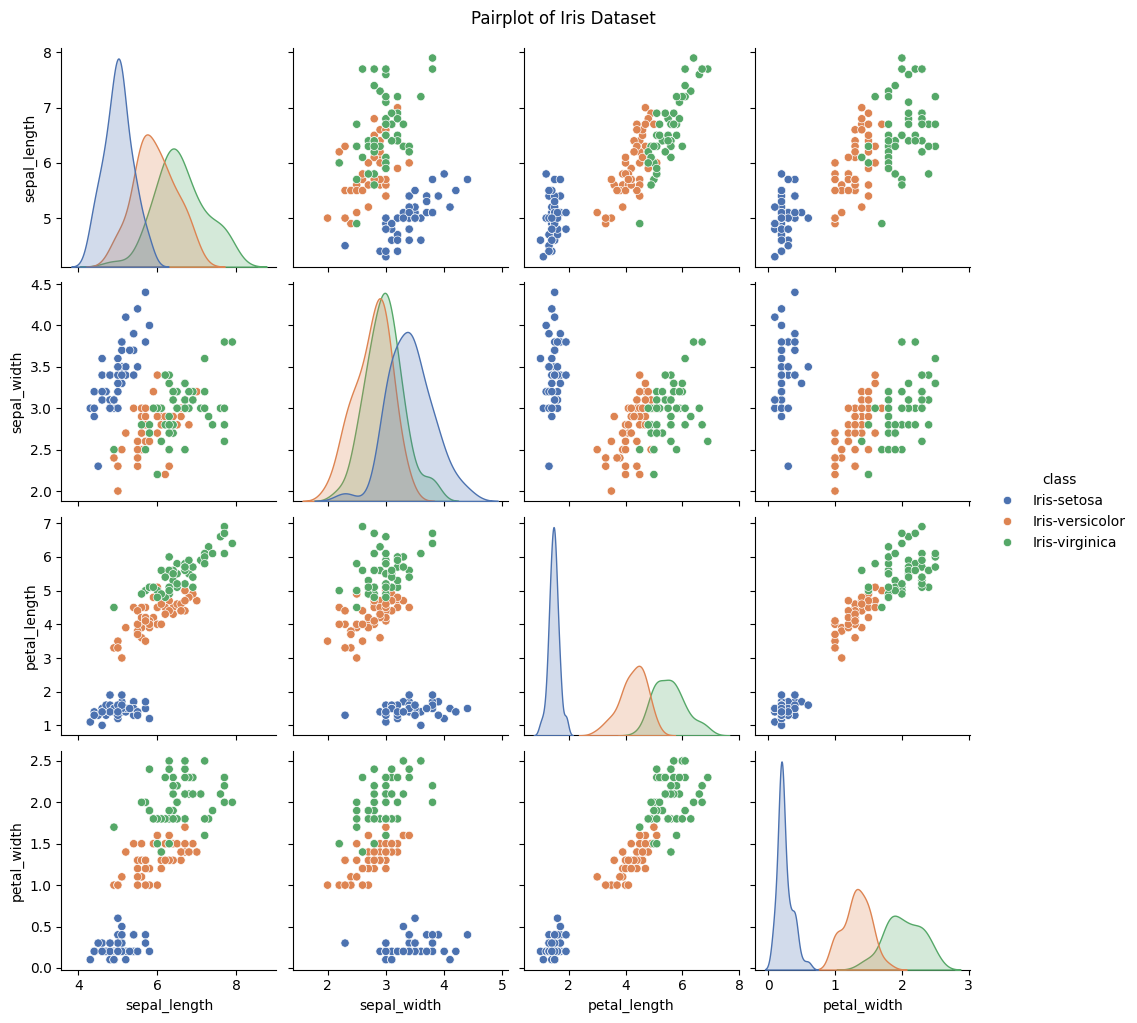

In [40]:
# Pairplot: Scatterplot of all variables
sns.pairplot(df, vars=["sepal_length", "sepal_width", "petal_length", "petal_width"], 
             hue="class", palette="deep")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

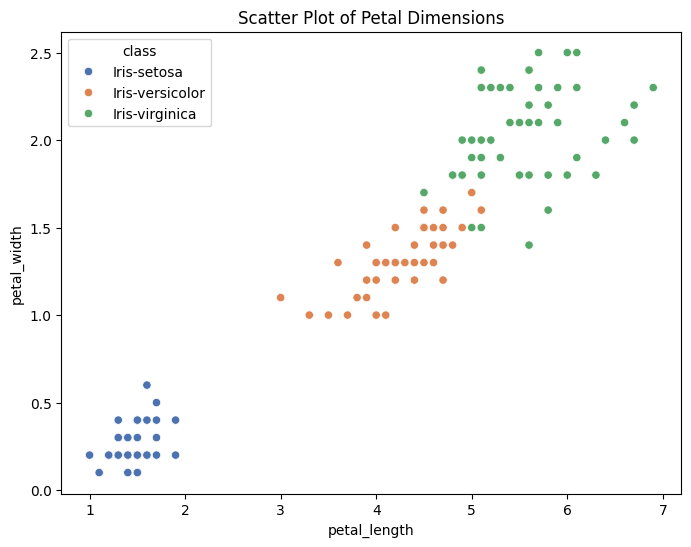

In [ ]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="class", palette="deep")
plt.title("Scatter Plot of Petal Dimensions")
plt.show()


Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [42]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
k = 3

# Do K-means clustering (assing each point in the dataset to a cluster)
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
predicted_clusters = kmeans.fit_predict(df.iloc[:, 0:4])

# Print estimated cluster of each point in the dataset
print("Estimated clusters (first five rows):")
print(predicted_clusters[:5])


Estimated clusters (first five rows):
[1 1 1 1 1]


NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [43]:
# Add a new column to the dataset with the cluster information
df['cluster'] = predicted_clusters

In [44]:
# Cluster centroides
centroids = kmeans.cluster_centers_

In [45]:
# Sum of squared error (sse) of the final model
kmeans.inertia_

78.9450658259773

In [46]:
# The number of iterations required to converge
kmeans.n_iter_

12

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

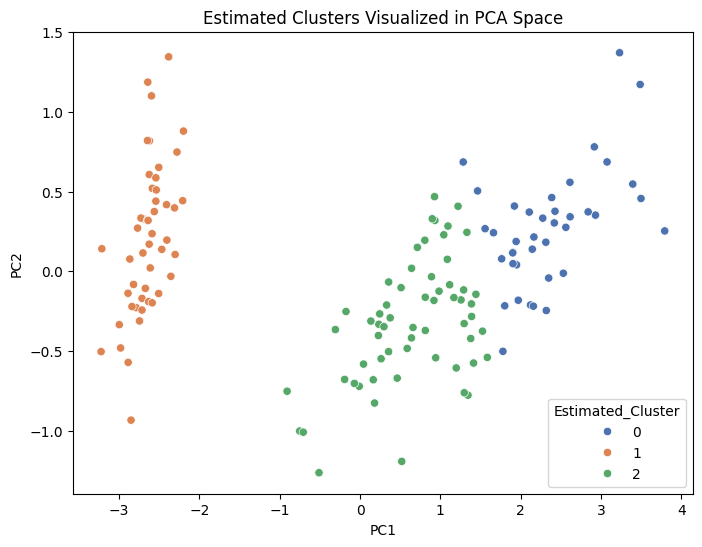

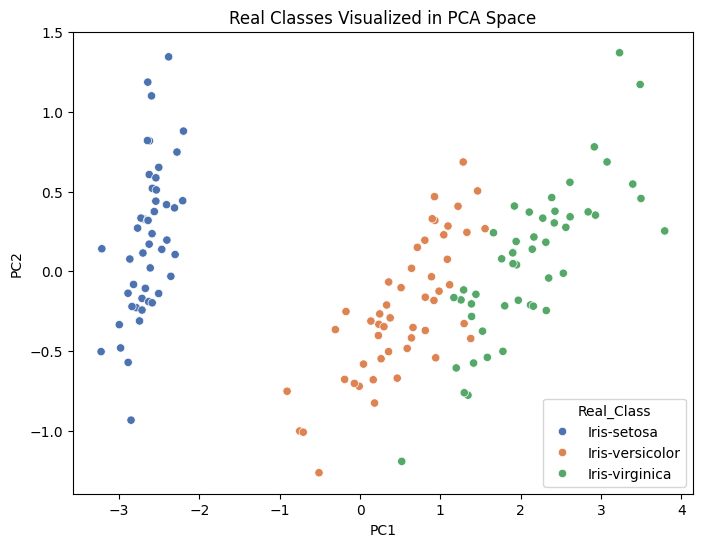

In [ ]:
pca = PCA(n_components=2, random_state=42)
principal_components = pca.fit_transform(df.iloc[:, 0:4])

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Real_Class'] = df['class']
pca_df['Estimated_Cluster'] = df['cluster']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Estimated_Cluster', palette="deep")
plt.title("Estimated Clusters Visualized in PCA Space")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Real_Class', palette="deep")
plt.title("Real Classes Visualized in PCA Space")
plt.show()

# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k